In [1]:
# import some necessary libraries :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# load our data and display first 5 rows of it :
df = pd.read_csv("Loan_Default.csv")
pd.set_option('display.max_columns', None)
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [3]:
# lowercase columns names :
df = df.rename(str.lower, axis='columns')
df.columns

Index(['id', 'year', 'loan_limit', 'gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'credit_worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'interest_rate_spread', 'upfront_charges', 'term', 'neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'secured_by', 'total_units',
       'income', 'credit_type', 'credit_score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'ltv', 'region', 'security_type',
       'status', 'dtir1'],
      dtype='object')

### Attribute Information


* **loan_limit** : A maximum loan amount, or loan limit, describes the total amount of money that an applicant is authorized to borrow. Maximum loan amounts are used for standard loans, credit cards, and line-of-credit accounts.
* ("cf" : means a loan made or to be made under the Credit Facility).
* **gender** : either of the two sexes (male and female), especially when considered with reference to social and cultural differences rather than biological ones. The term is also used more broadly to denote a range of identities that do not correspond to established ideas of male and female.
* **loan_type** : It can be classified into three main categories, [unsecured and secured, conventional, and open-end and closed-end loans].
*
* **loan_purpose** : the purpose for which the proceeds of the Loan will be used.
* **credit_worthiness** : The extent to which a person or company is considered suitable to receive financial credit is often based on their reliability in paying money back in the past.
* **open_credit** : you will choose if you want to open credit (opc) or not (nopc), it is  refers to accounts that you can borrow from up to a maximum amount (like a credit card) but which must also be paid back in full each month. Open credit is generally associated with charge cards.
* **business_or_commercial** : whether your loan is for your owen business or commercial activity, ( nob/c = no business or commercial ) ( b/c = loan for business or commerical ).
* **loan_amount** : the amount of money you will borrow.
* **rate_of_interest** : the amount a lender charges a borrower and is a percentage of the principal—the amount loaned.
* **interest_rate_spread** : The net interest rate spread is the difference between the interest rate a bank pays to depositors and the interest rate it receives from loans to consumers. For example, Bank ABC charges customers 4% interest for car loans and pays out interest to depositors for holding their money at a rate of 1.75%. It means that the interest rate spread will be 4% – 1.75% = 2.25%.

* **upfront_charges** : an amount of money which borrower would pay before a particular piece of work or a particular service is done or received.

* **term** : A term loan is a monetary loan that is repaid in regular payments over a set period of time.
* **neg_ammortization** : paying off a loan with regular payments so that the amount you owe goes down with each payment. Negative amortization means that even when you pay, the amount you owe will still go up because you are not paying enough to cover the interest.( not_neg == the amount you owe will still go down , neg_amm == the amount you owe will still go up ).
* **interest_only** : An interest-only is a type in which the borrower is required to pay only the interest on the loan for a certain period.
* **lump_sum_payment** : an amount paid all at once, as opposed to an amount that is divvied up and paid in installments, a lump-sum payment is not the best choice for every beneficiary; for some, it may make more sense for the funds to be annuitized as periodic payments. ( lpsm == borrower paid all at once , not_lpsm == borrower will divvy up and paid in installments ).
* **property_value** : property value is what someone is willing to pay for a property. 
* **construction_type** : type of construction ( mh == Mannhol , sb = Steel Batten).
* **occupancy_type** : Building occupancy classifications refer to categorizing structures based on their usage and are primarily used for building and fire code enforcement. 
* **secured_by** : all Security granted or to be granted by the Borrower to the Bank to guarantee the repayment of the Bank Debt
* **total_units** : number of unites will borrower buy.
* **income** : borrower income for work or through investments.
* **credit_type** : type of credit.
* **credit_score** : A credit score is a number between 300–850 (in general but in this dataset we will see that land between 500 : 900 ) it  that depicts a consumer's creditworthiness. The higher the score, the better a borrower looks to potential lenders.

* **co-applicant_credit_type** : A co-applicant is an additional person or orginisation considered in the underwriting and approval of a loan or other type of application. ( CIB or EXP )
* **age** : age of borrower.
* **submission_of_application** : to present for the approval, consideration, or decision of another or others: to submit a plan; to submit an application.
* **ltv** : the loan-to-value (LTV) ratio is a lending risk assessment ratio that financial institutions and other lenders examine before approving a mortgage. (ltv = mortgages amount / property value).
For example, suppose you buy a home that appraises for 100,000. However, the owner is willing to sell it for 90,000. If you make a 10,000 down payment, your loan is for 80,000, which results in an LTV ratio of 80% (i.e., 80,000/100,000). If you were to increase the amount of your down payment to 15,000, your mortgage loan is now 75,000. This would make your LTV ratio 75% (i.e., 75,000/100,000).


* **region** : property region  ( south, North, central, North-East )
* **security_type** : type of property security ( direct or indirect )
* **status** : Whether or not the loan will be approved ( 1 = approved and 0 = not approved )
* **dtir1** :

In [4]:
# our data size :
print("our data consists of",df.shape[0],"rows and",df.shape[1], 'columns.')

our data consists of 148670 rows and 34 columns.


In [5]:
# data information :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   credit_worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  interest_rate_spread       112031 non-null  float64
 13  upfront_charges            10

* we will have to deal with null values during cleaning process.

In [6]:
# statistical description of our numerical features:
df.describe()

,id,year,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,credit_score,ltv,status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [7]:
# number of Null values in each column :
df.isnull().sum()

id                               0
year                             0
loan_limit                    3344
gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
credit_worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
interest_rate_spread         36639
upfront_charges              39642
term                            41
neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
secured_by                       0
total_units                      0
income                        9150
credit_type                      0
credit_score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [8]:
# the percentage of missing values in each column :
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
# sorting our result in ascending order :
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,percent_missing
id,0.000000
security_type,0.000000
region,0.000000
co-applicant_credit_type,0.000000
credit_score,0.000000
credit_type,0.000000
total_units,0.000000
secured_by,0.000000
occupancy_type,0.000000
construction_type,0.000000


* we can see that there are some columns have a little percentage of Null values ("term") and some have high percentage of Null values ( like "rate_of_interest" column )

In [9]:
# check duplicated records :
df.duplicated().sum()

0

* there are no any duplicated records.

## Cleaning Data :

In [10]:
df.head(3)

,id,year,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,secured_by,total_units,income,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,ltv,region,security_type,status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   credit_worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  interest_rate_spread       112031 non-null  float64
 13  upfront_charges            10

### Split Quantitative Variables :

In [12]:
df_quant = df[['loan_limit','gender','approv_in_adv','loan_type','loan_purpose','credit_worthiness','open_credit',
               'business_or_commercial','neg_ammortization','interest_only','lump_sum_payment','construction_type',
               'occupancy_type','secured_by','total_units','credit_type','co-applicant_credit_type','age',
              'submission_of_application','region','security_type','status']]
# we add "status" column here for some analysis later !

In [23]:
# we will starting to clean quantitative variables first then qualitative :
df_quant.head()

,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,neg_ammortization,interest_only,lump_sum_payment,construction_type,occupancy_type,secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,region,security_type,status
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,EXP,CIB,25-34,to_inst,south,direct,1
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,not_neg,not_int,lpsm,sb,pr,home,1U,EQUI,EXP,55-64,to_inst,North,direct,1
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,neg_amm,not_int,not_lpsm,sb,pr,home,1U,EXP,CIB,35-44,to_inst,south,direct,0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,EXP,CIB,45-54,not_inst,North,direct,0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,CRIF,EXP,25-34,not_inst,North,direct,0


#### loan_limit :

In [24]:
df.loan_limit.unique()

array(['cf', nan, 'ncf'], dtype=object)

In [25]:
# replace null values to string :
df.loan_limit.fillna('Null', inplace=True)

# just 2.5% of our data have missing value in the "loan_limit" column, so we can remove those rows from our data and continue.
df = df[df['loan_limit'] != 'Null']

# replacing "loan_limit" values from string to int :
df['loan_limit'] = df['loan_limit'].map({'ncf':0,
                            'cf':1})

In [26]:
# rename (loan_limit) column to (credit_facility) :
df.rename(columns = {'loan_limit' : 'credit_facility'}, inplace = True)

#### gender :

In [27]:
df.gender.value_counts()

Male                 41346
Joint                40512
Sex Not Available    36853
Female               26615
Name: gender, dtype: int64

* We will keep  all values as they are.
* we may use dummy technique later during analysis ...

#### approv_in_adv :

In [28]:
df['approv_in_adv'].isnull().sum()

908

In [29]:
# checking the values of this feature :
df['approv_in_adv'].unique()

array(['nopre', 'pre', nan], dtype=object)

In [30]:
# replace null values to string :
df.approv_in_adv.fillna('Null', inplace=True)

# remove null values from our dataset :
df = df[df['approv_in_adv'] != 'Null']

# replacing "Neg_ammortization" values from string to int :
df['approv_in_adv'] = df['approv_in_adv'].map({'nopre':0,
                            'pre':1})

#### loan_type :

In [31]:
df.loan_type.value_counts()

type1    109922
type2     20097
type3     14399
Name: loan_type, dtype: int64

* from "missing_value_df" table we can see that there are no missing value in (loan_type) columns and also there are no any outliers, so we will not change anything inside this variable .
* we could use dummy technique later during analysis.

#### loan_purpose :

In [32]:
df.loan_purpose.isnull().sum()

134

In [33]:
# just few columns have misssing values in (loan_purpose) columns , so we will remove those records 
df.loan_purpose.fillna('Null', inplace=True)
df = df[df['loan_purpose'] != 'Null']

* we may use dummy technique later during analysis ...

#### credit_worthiness :

In [34]:
df.credit_worthiness.unique() # there is no any null values .

array(['l1', 'l2'], dtype=object)

#### open_credit :

In [35]:
# there is no any null values inside this variable as we saw from "missing_value_df" table
# checking the values of this feature :
df.open_credit.unique()

array(['nopc', 'opc'], dtype=object)

In [36]:
# replacing the "open_credit" values from string to int :
df['open_credit'] = df['open_credit'].map({'nopc':0,
                            'opc':1})

#### business_or_commercial :

In [37]:
# there is no any null values inside this variable as we saw from "missing_value_df" table
df.business_or_commercial.unique()

array(['nob/c', 'b/c'], dtype=object)

In [38]:
# replacing the "business_or_commercial" values from string to int :
df['business_or_commercial'] = df['business_or_commercial'].map({'nob/c':0,
                            'b/c':1})

#### neg_ammortization :

In [39]:
df['neg_ammortization'].isnull().sum()

121

In [40]:
# checking the values of this feature :
df['neg_ammortization'].unique()

array(['not_neg', 'neg_amm', nan], dtype=object)

In [41]:
# replace null values to string :
df.neg_ammortization.fillna('Null', inplace=True)

# remove null values from our dataset :
df = df[df['neg_ammortization'] != 'Null']

# replacing "neg_ammortization" values from string to int :
df['neg_ammortization'] = df['neg_ammortization'].map({'not_neg':0,
                            'neg_amm':1})

#### interest_only :

In [42]:
# checking the values of this feature :
df.interest_only.unique()

array(['not_int', 'int_only'], dtype=object)

In [43]:
# replacing the "interest_only" values from string to int :
df['interest_only'] = df['interest_only'].map({'not_int':0,
                            'int_only':1})

#### lump_sum_payment :

In [44]:
# checking the values of this feature :
df.lump_sum_payment.unique()

array(['not_lpsm', 'lpsm'], dtype=object)

In [45]:
# replacing the "interest_only" values from string to int :
df['lump_sum_payment'] = df['lump_sum_payment'].map({'not_lpsm':0,
                            'lpsm':1})

#### construction_type :

In [46]:
# checking the values of this feature :
df.construction_type.unique()  ## there is no any null values

array(['sb', 'mh'], dtype=object)

* "construction_type", "occupancy_type", "secured_by", "total_units", "credit_type", "co-applicant_credit_type" and "region" All are clean.!

#### age :

In [47]:
# checking the values of this feature :
df.age.unique()

array(['25-34', '55-64', '35-44', '45-54', '65-74', '>74', '<25', nan],
      dtype=object)

In [48]:
# view number of records with null value:
df.age.isnull().sum()

180

In [49]:
# replace null values to string :
df.age.fillna('Null', inplace=True)

# remove null values from our dataset :
df = df[df['age'] != 'Null']

In [50]:
# view number of records with null value:
df.submission_of_application.unique()

array(['to_inst', 'not_inst'], dtype=object)

In [51]:
# changing the "open_credit" values from string to int :
df['submission_of_application'] = df['submission_of_application'].map({'to_inst':1,'not_inst':0})

## Cleaning Qualitative Variables :

In [52]:
df_numeric = df[['id','year','loan_amount','rate_of_interest','interest_rate_spread','upfront_charges','term','property_value',
              'income','credit_score','ltv','dtir1']]

#### id :

In [53]:
df.id.duplicated().sum()

0

In [54]:
# there is no duplicated "id" number !!

#### year :

In [55]:
df.year.unique()

array([2019], dtype=int64)

In [56]:
# all records had done within 2019, those two earier columns will not affect our analysis :
# removing (id) and (year) columns :
df = df.drop(['id','year'], axis = 1)

In [57]:
df_numeric.head(2)

,id,year,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,credit_score,ltv,dtir1
0,24890,2019,116500,NaN,NaN,NaN,360.0,118000.0,1740.0,758,98.728814,45.0
1,24891,2019,206500,NaN,NaN,NaN,360.0,NaN,4980.0,552,NaN,NaN


#### loan_amount :

In [58]:
# (loan_amount) column dosen't include any null value, we will check it's statics :
df.loan_amount.describe()

count    1.439830e+05
mean     3.317719e+05
std      1.842255e+05
min      1.650000e+04
25%      1.965000e+05
50%      2.965000e+05
75%      4.365000e+05
max      3.576500e+06
Name: loan_amount, dtype: float64

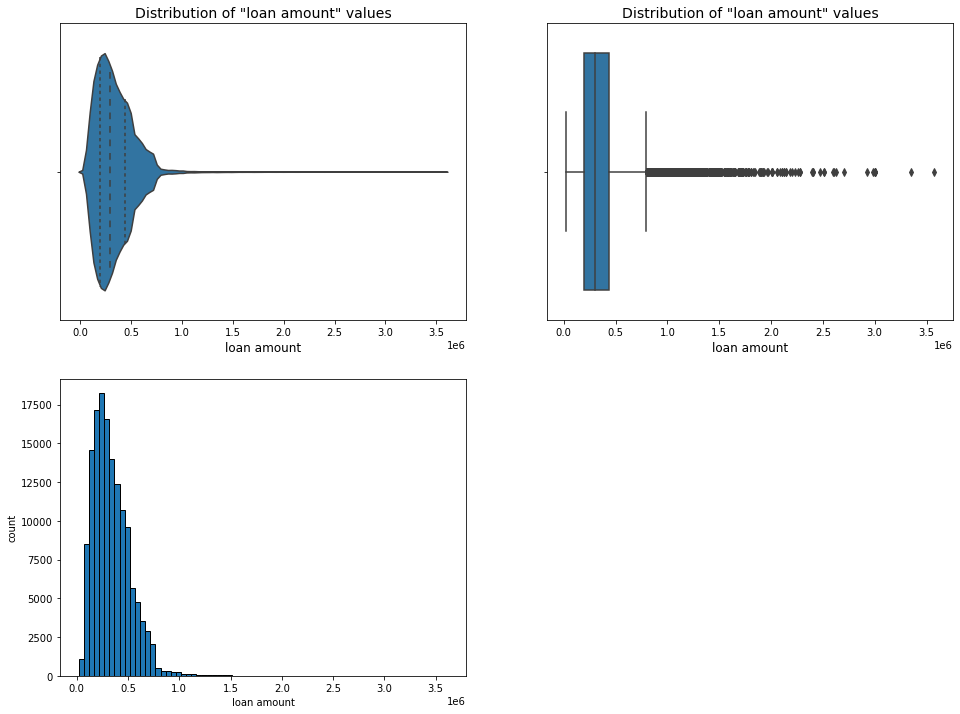

In [59]:
# loan_amount :

# loan_amount values visualization :
plt.figure(figsize = [16,12]);
plt.subplot(2,2,1);
sb.violinplot(data = df, x = "loan_amount", inner = 'quartile');
plt.xlabel("loan amount", size = 12);
plt.title('Distribution of "loan amount" values', size = 14);

plt.subplot(2,2,2);
sb.boxplot(data = df, x = "loan_amount");
plt.xlabel("loan amount", size = 12);
plt.title('Distribution of "loan amount" values', size = 14);

plt.subplot(2,2,3);
bins = np.arange(df.loan_amount.min(), df.loan_amount.max() + 50000, 50000)
plt.hist(data = df,  x = 'loan_amount', bins = bins, edgecolor = 'black');
plt.xlabel("loan amount");
plt.ylabel("count");

#plt.subplot(2,2,4);


In [60]:
# limit x axis :
df[df['loan_amount'] > 1.5*(10**6)].shape[0]

139

In [61]:
# remove the past (loan_amount) records :
df = df[df['loan_amount'] <= 1.5*(10**6)]

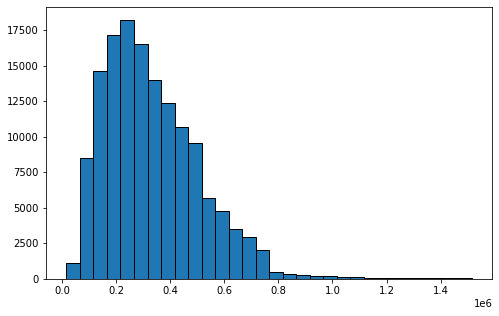

In [62]:
# visualizing the remaining records :
plt.figure(figsize = [8,5])
bins = np.arange(df.loan_amount.min(), df.loan_amount.max() + 50000, 50000)
plt.hist(data = df,  x = 'loan_amount', bins = bins, edgecolor = 'black');

* (loan_amount) values are left-skewed.

#### rate_of_interest :

In [63]:
df.rate_of_interest.isnull().sum()

35177

In [64]:
df[df['rate_of_interest'].isnull()].status.value_counts()

1    35177
Name: status, dtype: int64

#### interest_rate_spread :

In [65]:
df.interest_rate_spread.isnull().sum()

35177

In [66]:
df[df['interest_rate_spread'].isnull()].status.value_counts()

1    35177
Name: status, dtype: int64

#### upfront_charges :

In [67]:
df[df['upfront_charges'].isnull()].status.value_counts()

1    35177
0     3054
Name: status, dtype: int64

####  we can notice that :
* all null values for (rate_of_interest) and (interest_rate_spread) have status value '1'
* we can fill nulls with mean value of each variable when status = 1
* the same for (upfront_charges) null values except some cases it give statues with '0' value .
* for status values = 0 , we will fill nulls with the mean value of (upfront_charges) when status = 0
* for status values = 1 , we will fill nulls with the mean value of (upfront_charges) when status = 1

In [68]:
df.rate_of_interest.describe()

count    108667.000000
mean          4.039831
std           0.563084
min           0.000000
25%           3.625000
50%           3.990000
75%           4.375000
max           8.000000
Name: rate_of_interest, dtype: float64

In [69]:
df.query("status == 1").rate_of_interest.mean()

nan

In [70]:
df.query("status == 0").rate_of_interest.mean()

4.039830859413324

In [71]:
# all records with status = 1 have null value in both columns "rate_of_interest" and "interest_rate_spread".

In [72]:
df.query("status == 1").upfront_charges.mean()

nan

In [73]:
df.query("status == 0").upfront_charges.mean()

3229.1860491604775

In [74]:
# also we can see that all records with status = 1 have null value in column "upfront_charges".
# we will remove those three columns :
df = df.drop(['rate_of_interest','interest_rate_spread','upfront_charges'], axis = 'columns')

#### term :

In [75]:
df['term'].isnull().sum()

41

In [76]:
# replace null values to string :
df.term.fillna('Null', inplace=True)
# remove null values from our dataset :
df = df[df['term'] != 'Null']

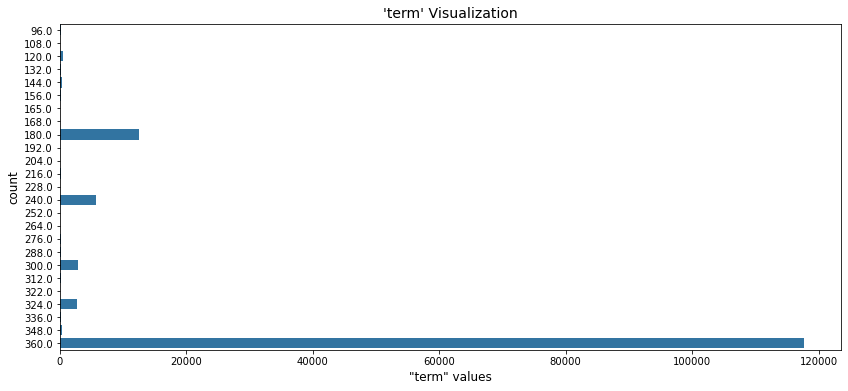

In [77]:
# visualization of "term" variable :
plt.figure(figsize = [14,6]);
#plt.subplot(2,2,1);
color = sb.color_palette()[0]
sb.countplot(data = df, y = 'term', color = color);
plt.title("'term' Visualization", size = 14);
plt.xlabel('"term" values', size = 12);
plt.ylabel("count", size = 12);

In [78]:
df.term.unique()

array([360.0, 300.0, 180.0, 312.0, 144.0, 240.0, 348.0, 324.0, 120.0,
       192.0, 156.0, 228.0, 336.0, 288.0, 108.0, 276.0, 96.0, 132.0,
       216.0, 168.0, 204.0, 264.0, 252.0, 165.0, 322.0], dtype=object)

In [79]:
df.query("term == 360").shape[0] / df.shape[0]

0.8182930815073399

* 81.7% of "term" values = 360 !

#### property_value :

In [80]:
# percentage of record with null value :
df.property_value.isnull().sum() *100 / df.shape[0]

10.129134997183646

In [81]:
df[df['property_value'].isnull()].status.value_counts()

1    14564
0        2
Name: status, dtype: int64

#### Notes:
* 10% of our data have 'nan' value in (property_value) column , too big to remove them !!
* all (property_value) nulls have status = 1 ( except for 2 have value = 0 for status ), we will remove those two recorts.

In [82]:
df[df['property_value'].isnull()].query("status == 0")

,credit_facility,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,loan_amount,term,neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,secured_by,total_units,income,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,ltv,region,security_type,status,dtir1
123808,1,Sex Not Available,0,type1,p3,l1,0,0,476500,360,0,0,0,NaN,sb,pr,home,1U,7020.0,CRIF,600,EXP,65-74,1,NaN,south,direct,0,39.0
145931,1,Female,0,type1,p3,l1,0,0,146500,180,0,0,0,NaN,sb,pr,home,1U,3960.0,CIB,793,CIB,55-64,1,NaN,central,direct,0,24.0


In [83]:
# dropping the 2 records :
df.drop([123808,145931], inplace = True)

In [84]:
# checking if the records are dropped :
df[df['property_value'].isnull()].query("status == 0").sum().sum()

0.0

In [85]:
#### now we have all null values at (property_value) column have status == 1

#### اى قيمة هتكون موجوده فى النهاية النتيجة هيكون ان الريكورد متوافقش عليها و بالتالى ممكن القيمة دى هيكون ملهاش تأثير فى النتيجة سواء اتوافق او متوافقش عليه 

# نحذف العمود !! ؟

In [86]:
df.query("status == 1").property_value.describe()

count    2.059800e+04
mean     4.527820e+05
std      3.943272e+05
min      8.000000e+03
25%      2.280000e+05
50%      3.480000e+05
75%      5.580000e+05
max      1.200800e+07
Name: property_value, dtype: float64

In [87]:
df.query("status == 0").property_value.describe()

count    1.086390e+05
mean     5.056534e+05
std      3.391315e+05
min      8.000000e+03
25%      2.880000e+05
50%      4.280000e+05
75%      6.380000e+05
max      9.268000e+06
Name: property_value, dtype: float64

#### income :

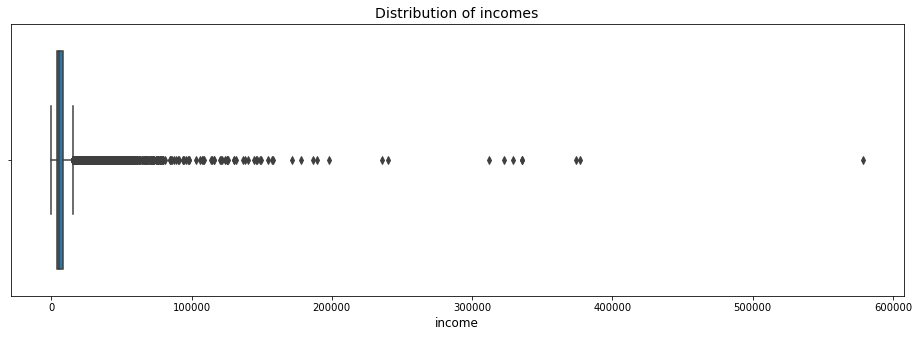

In [97]:
# income values visualization :
plt.figure(figsize=[16,5]);
sb.boxplot(data = df, x = 'income');
plt.xlabel("income", size = 12);
plt.title("Distribution of incomes", size = 14);

In [98]:
# outliers :
IQR = df['income'].quantile(.75) - df['income'].quantile(.25) 
limit_outlier  = df['income'].quantile(.75) + (1.5*IQR)
print('All income values which higher than',limit_outlier,'considered as outliers.')
print('there are',df[df['income'] > limit_outlier].shape[0],'records as outliers out of',df.shape[0])

All income values which higher than 15720.0 considered as outliers.
there are 6257 records as outliers out of 143801


In [99]:
df.income.isnull().sum()

8832

In [100]:
df[df['income'].isnull()].status.value_counts()

0    7804
1    1028
Name: status, dtype: int64

In [101]:
# nearby 6% of records have missing "income" value , we can remove those records :
df.income.fillna('Null', inplace=True)
df = df[df['income'] != 'Null']

In [102]:
df.income.isnull().sum()

0

#### ltv : 

In [103]:
df.ltv.isnull().sum() / df.shape[0]

0.10779512332461529

In [104]:
df.ltv.describe()

count    120420.000000
mean         71.477678
std          18.919402
min           0.967478
25%          59.799652
50%          74.280576
75%          84.763314
max         263.541667
Name: ltv, dtype: float64

In [105]:
# if we remove the null values for (property_value) feature , we will get 0 missing value in (LTV) feature 
# so all null values in (property_value) are also have null value in (LTV) column !
# we have all null values at (property_value) column have status == 1

In [106]:
# removing records have null values in (ltv) column :
df.ltv.fillna('Null', inplace=True)
df = df[df['ltv'] != 'Null']

In [107]:
df.ltv.isnull().sum()

0

In [108]:
df.property_value.isnull().sum()

0

* we can see that all records have null value in ( property_value ) have been removed after removing ( ltv ) nulls.

In [109]:
df.isnull().sum()

credit_facility              0
gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
credit_worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
term                         0
neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
secured_by                   0
total_units                  0
income                       0
credit_type                  0
credit_score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
ltv                          0
region                       0
security_type                0
status                       0
dtir1                        0
dtype: int64

## Univariate Visualisation :

In [111]:
df.head(2)

,credit_facility,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,loan_amount,term,neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,secured_by,total_units,income,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,ltv,region,security_type,status,dtir1
0,1,Sex Not Available,0,type1,p1,l1,0,0,116500,360,0,0,0,118000.0,sb,pr,home,1U,1740,EXP,758,CIB,25-34,1,98.7288,south,direct,1,45.0
2,1,Male,1,type1,p1,l1,0,0,406500,360,1,0,0,508000.0,sb,pr,home,1U,9480,EXP,834,CIB,35-44,1,80.0197,south,direct,0,46.0


In [112]:
df.shape

(120420, 29)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120420 entries, 0 to 148669
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   credit_facility            120420 non-null  int64  
 1   gender                     120420 non-null  object 
 2   approv_in_adv              120420 non-null  int64  
 3   loan_type                  120420 non-null  object 
 4   loan_purpose               120420 non-null  object 
 5   credit_worthiness          120420 non-null  object 
 6   open_credit                120420 non-null  int64  
 7   business_or_commercial     120420 non-null  int64  
 8   loan_amount                120420 non-null  int64  
 9   term                       120420 non-null  object 
 10  neg_ammortization          120420 non-null  int64  
 11  interest_only              120420 non-null  int64  
 12  lump_sum_payment           120420 non-null  int64  
 13  property_value             12

In [114]:
# (term) and (income) columns' type need to be hanged from "str" to "int" :
df['term'] = df['term'].astype('int64')
df['income'] = df['income'].astype('int64')

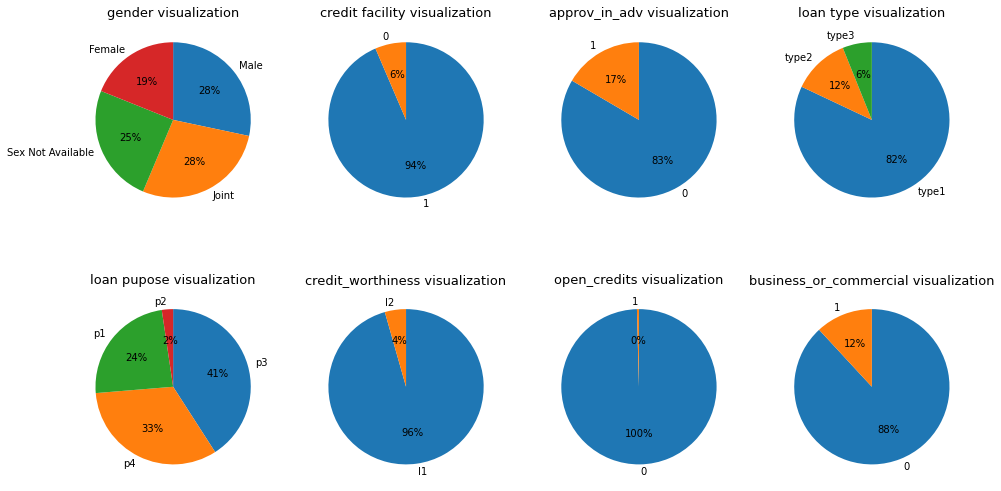

In [115]:
plt.figure(figsize = [16,9]);

plt.subplot(2,4,1);
gender_sorted = df['gender'].value_counts()
plt.pie(gender_sorted, labels = gender_sorted.index, startangle = 90, counterclock = False, autopct='%1.0f%%');
plt.title("gender visualization", size = 13);

plt.subplot(2,4,2);
credit_facility_sorted = df['credit_facility'].value_counts()
plt.pie(credit_facility_sorted, labels = credit_facility_sorted.index, startangle = 90, counterclock = False,
        autopct='%1.0f%%');
plt.title("credit facility visualization", size = 13);


plt.subplot(2,4,3);
approv_in_adv_sorted = df['approv_in_adv'].value_counts()
plt.pie(approv_in_adv_sorted, labels = approv_in_adv_sorted.index, startangle = 90, counterclock = False, autopct='%1.0f%%');
plt.title("approv_in_adv visualization", size = 13);


plt.subplot(2,4,4);
loan_type_sorted = df['loan_type'].value_counts()
plt.pie(loan_type_sorted, labels = loan_type_sorted.index, startangle = 90, counterclock = False, autopct='%1.0f%%');
plt.title("loan type visualization", size = 13);


plt.subplot(2,4,5);
loan_purpose_sorted = df['loan_purpose'].value_counts()
plt.pie(loan_purpose_sorted, labels = loan_purpose_sorted.index, startangle = 90, counterclock = False, autopct='%1.0f%%');
plt.title("loan pupose visualization", size = 13);

plt.subplot(2,4,6);
credit_worthiness_sorted = df['credit_worthiness'].value_counts()
plt.pie(credit_worthiness_sorted, labels = credit_worthiness_sorted.index, startangle = 90, counterclock = False,
        autopct='%1.0f%%');
plt.title("credit_worthiness visualization", size = 13);

plt.subplot(2,4,7);
open_credit_sorted = df['open_credit'].value_counts()
plt.pie(open_credit_sorted, labels = open_credit_sorted.index, startangle = 90, counterclock = False, autopct='%1.0f%%');
plt.title("open_credits visualization", size = 13);

plt.subplot(2,4,8);
business_or_commercial_sorted = df['business_or_commercial'].value_counts()
plt.pie(business_or_commercial_sorted, labels = business_or_commercial_sorted.index, startangle = 90, counterclock = False
        , autopct='%1.0f%%');
plt.title("business_or_commercial visualization", size = 13);

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

In [116]:
# we can see from "open_credit" visualisation that nearby 100% of values == 0 , we will check the number of values == 1
df.open_credit.value_counts()

0    119925
1       495
Name: open_credit, dtype: int64

In [117]:
# very low records with "open_credit" value = 1 , removing those records:
df = df[df['open_credit'] != 1]

In [118]:
# now all records have 'open_credit' value = 0 
print(df.open_credit.value_counts())
# we can remove "open_credit" columns from dataset that it will not affect our prediction analysis :
df = df.drop(columns = ['open_credit'])

0    119925
Name: open_credit, dtype: int64


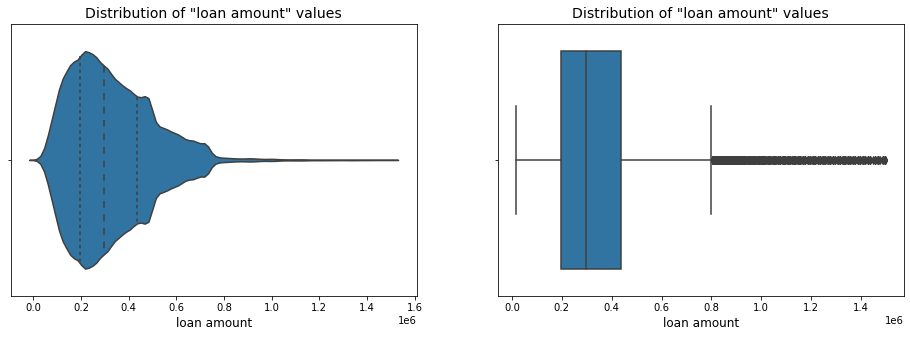

In [119]:
# loan_amount:

# loan_amount values visualization :
plt.figure(figsize = [16,5]);
plt.subplot(1,2,1);
sb.violinplot(data = df, x = "loan_amount", inner = 'quartile');
plt.xlabel("loan amount", size = 12);
plt.title('Distribution of "loan amount" values', size = 14);

plt.subplot(1,2,2);
sb.boxplot(data = df, x = "loan_amount");
plt.xlabel("loan amount", size = 12);
plt.title('Distribution of "loan amount" values', size = 14);

In [120]:
# statistical distribution of values :
df.loan_amount.describe()

count    1.199250e+05
mean     3.285627e+05
std      1.763293e+05
min      1.650000e+04
25%      1.965000e+05
50%      2.965000e+05
75%      4.365000e+05
max      1.496500e+06
Name: loan_amount, dtype: float64

In [122]:
# detecting outlier using (IQR) method :

IQR = df['loan_amount'].quantile(.75) - df['loan_amount'].quantile(.25) 
# showing the outliers :
# from boxplot we can see that all outliers are in the upper side of data !
out_limit_value = (df['loan_amount'].quantile(.75)) + (1.5*IQR)
out_data_count = df[df['loan_amount'] > out_limit_value].shape[0]
print('All "loan_amount" values which higher than',out_limit_value,'considered as outliers.')
print('there are',out_data_count ,'records as outliers out of',df.shape[0])

All "loan_amount" values which higher than 796500.0 considered as outliers.
there are 1309 records as outliers out of 119925


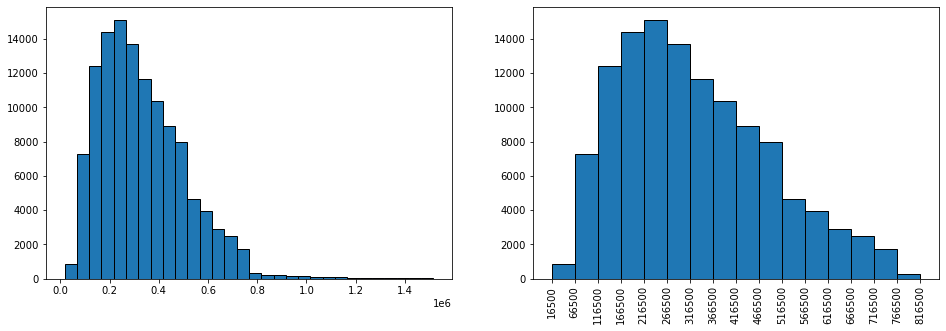

In [123]:
# loan_amount visualization :
plt.figure(figsize = [16,5]);
plt.subplot(1,2,1);
bins = np.arange(df.loan_amount.min(), df.loan_amount.max() + 50000, 50000)
plt.hist(data = df,  x = 'loan_amount', bins = bins, edgecolor = 'black');


# limit x-axis :
plt.subplot(1,2,2);
no_out_data = df[df['loan_amount'] <= out_limit_value]
bins = np.arange(no_out_data.loan_amount.min(), no_out_data.loan_amount.max() + 50000, 50000)
plt.hist(data = no_out_data,  x = 'loan_amount', bins = bins, edgecolor = 'black');
plt.xticks(bins, rotation = 90);

In [124]:
# we can see that our data with respect to (loan_amount) feature is Right-Skewed
# now we will remove those outliers from data :
df = no_out_data
df.shape[0]

118616

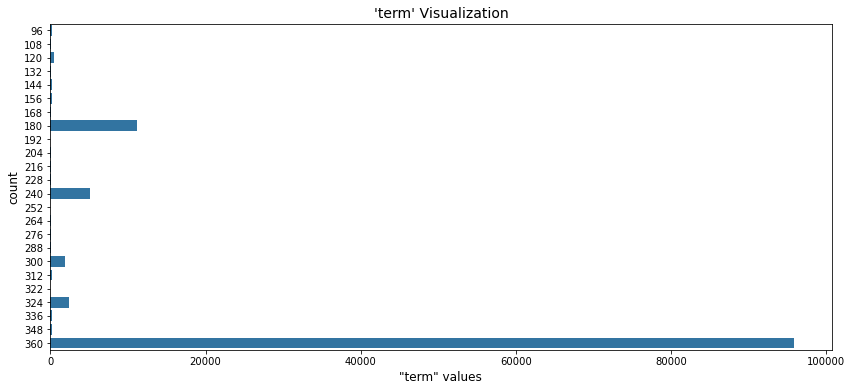

In [125]:
# visualization of "term" variable :
plt.figure(figsize = [14,6]);
#plt.subplot(2,2,1);
color = sb.color_palette()[0]
sb.countplot(data = df, y = 'term', color = color);
plt.title("'term' Visualization", size = 14);
plt.xlabel('"term" values', size = 12);
plt.ylabel("count", size = 12);

In [126]:
df.term.value_counts()

360    95889
180    11114
240     5118
324     2382
300     1919
120      443
144      236
348      233
336      185
312      166
96       160
156      156
216      101
276       82
288       81
132       75
168       71
228       59
204       50
264       40
108       31
192       16
252        8
322        1
Name: term, dtype: int64

In [127]:
df[df['term'] == 360].shape[0] / df.shape[0]

0.8083985297093141

* more than 80% of records have 'term' value = 360 !
* there is no pattern we can see from this visualization.

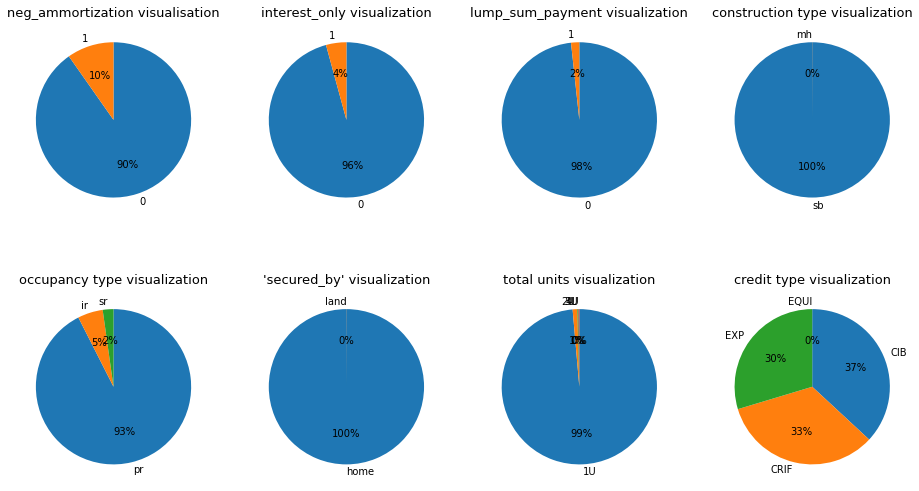

In [128]:
plt.figure(figsize = [16,9]);

plt.subplot(2,4,1);
gender_sorted = df['neg_ammortization'].value_counts()
plt.pie(gender_sorted, labels = gender_sorted.index, startangle = 90, counterclock = False, autopct='%1.0f%%');
plt.title("neg_ammortization visualisation", size = 13);

plt.subplot(2,4,2);
credit_facility_sorted = df['interest_only'].value_counts()
plt.pie(credit_facility_sorted, labels = credit_facility_sorted.index, startangle = 90, counterclock = False,
        autopct='%1.0f%%');
plt.title("interest_only visualization", size = 13);

plt.subplot(2,4,3);
approv_in_adv_sorted = df['lump_sum_payment'].value_counts()
plt.pie(approv_in_adv_sorted, labels = approv_in_adv_sorted.index, startangle = 90, counterclock = False, autopct='%1.0f%%');
plt.title("lump_sum_payment visualization", size = 13);

plt.subplot(2,4,4);
loan_type_sorted = df['construction_type'].value_counts()
plt.pie(loan_type_sorted, labels = loan_type_sorted.index, startangle = 90, counterclock = False, autopct='%1.0f%%');
plt.title("construction type visualization", size = 13);

plt.subplot(2,4,5);
loan_purpose_sorted = df['occupancy_type'].value_counts()
plt.pie(loan_purpose_sorted, labels = loan_purpose_sorted.index, startangle = 90, counterclock = False, autopct='%1.0f%%');
plt.title("occupancy type visualization", size = 13);

plt.subplot(2,4,6);
credit_worthiness_sorted = df['secured_by'].value_counts()
plt.pie(credit_worthiness_sorted, labels = credit_worthiness_sorted.index, startangle = 90, counterclock = False,
        autopct='%1.0f%%');
plt.title("'secured_by' visualization", size = 13);

plt.subplot(2,4,7);
open_credit_sorted = df['total_units'].value_counts()
plt.pie(open_credit_sorted, labels = open_credit_sorted.index, startangle = 90, counterclock = False, autopct='%1.0f%%');
plt.title("total units visualization", size = 13);

plt.subplot(2,4,8);
business_or_commercial_sorted = df['credit_type'].value_counts()
plt.pie(business_or_commercial_sorted, labels = business_or_commercial_sorted.index, startangle = 90, counterclock = False
        , autopct='%1.0f%%');
plt.title("credit type visualization", size = 13);

In [129]:
df.construction_type.value_counts()

sb    118586
mh        30
Name: construction_type, dtype: int64

In [130]:
df.secured_by.value_counts()

home    118586
land        30
Name: secured_by, dtype: int64

In [131]:
df.query("construction_type == 'mh'")

,credit_facility,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,business_or_commercial,loan_amount,term,neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,secured_by,total_units,income,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,ltv,region,security_type,status,dtir1
7973,1,Joint,0,type1,p1,l1,0,126500,360,0,0,0,138000.0,mh,pr,land,1U,4860,CRIF,847,EXP,25-34,1,91.6667,North,Indriect,1,20.0
32312,1,Sex Not Available,0,type1,p2,l1,0,76500,360,0,0,0,178000.0,mh,pr,land,1U,3660,CRIF,538,EXP,65-74,1,42.9775,south,Indriect,1,41.0
34412,1,Female,0,type1,p1,l1,0,56500,360,1,0,0,58000.0,mh,pr,land,1U,2340,CRIF,530,CIB,35-44,1,97.4138,south,Indriect,1,33.0
36155,1,Male,0,type2,p1,l1,1,106500,360,1,0,0,108000.0,mh,pr,land,1U,5700,CIB,758,CIB,25-34,1,98.6111,North,Indriect,1,36.0
44592,1,Sex Not Available,0,type1,p1,l1,0,316500,360,1,0,0,328000.0,mh,pr,land,1U,5280,CRIF,756,EXP,25-34,1,96.4939,south,Indriect,1,42.0
46022,1,Female,0,type2,p4,l1,1,126500,360,0,0,0,128000.0,mh,pr,land,1U,2760,CIB,650,EXP,35-44,1,98.8281,North,Indriect,1,38.0
47828,1,Female,0,type2,p1,l1,1,66500,360,0,0,0,88000.0,mh,pr,land,1U,2580,CIB,500,CIB,65-74,1,75.5682,North,Indriect,1,61.0
56153,1,Sex Not Available,0,type1,p3,l1,0,176500,348,0,0,0,268000.0,mh,pr,land,1U,2460,CIB,745,CIB,45-54,1,65.8582,south,Indriect,1,48.0
59732,1,Male,0,type2,p1,l1,1,306500,360,0,0,0,318000.0,mh,pr,land,1U,3420,EXP,695,CIB,25-34,0,96.3836,North,Indriect,1,46.0
60122,1,Male,0,type3,p1,l1,0,86500,360,1,0,0,88000.0,mh,pr,land,1U,1560,EXP,676,CIB,55-64,1,98.2955,North,Indriect,1,31.0


In [132]:
# we can see that all record with (construction_type = mh) have walue in secured_by columns = "land"
# removing "construction_type" = 'mh'
df = df[df['construction_type'] == 'sb']

In [133]:
# the remaining records all now are 'sb'construction_type and 'home' secured_by
# removing "construction_type and secured_by" columns 
df = df.drop(columns = ['construction_type','secured_by'])

In [134]:
# credit_type:
df.credit_type.value_counts()

CIB     43755
CRIF    39666
EXP     35163
EQUI        2
Name: credit_type, dtype: int64

In [135]:
# removing records with "credit_type" = EQUI
df.query("credit_type == 'EQUI'")

,credit_facility,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,business_or_commercial,loan_amount,term,neg_ammortization,interest_only,lump_sum_payment,property_value,occupancy_type,total_units,income,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,ltv,region,security_type,status,dtir1
69134,1,Sex Not Available,1,type1,p1,l1,0,236500,360,0,0,0,298000.0,pr,1U,6840,EQUI,621,CIB,35-44,1,79.3624,south,direct,0,22.0
77063,1,Male,0,type2,p1,l1,1,566500,360,0,0,0,578000.0,pr,1U,9300,EQUI,563,CIB,55-64,1,98.0104,North,direct,1,42.0


In [136]:
# removing records with "credit_type" = EQUI
df = df.drop(index = [69134,77063])

In [137]:
df.credit_type.value_counts()

CIB     43755
CRIF    39666
EXP     35163
Name: credit_type, dtype: int64

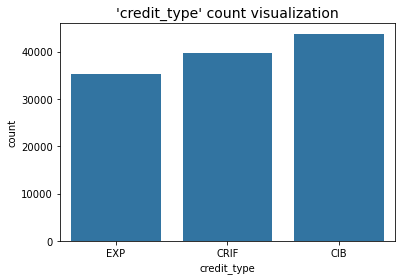

In [138]:
color = sb.color_palette()[0]
sb.countplot(data = df, x = 'credit_type', color = color);
plt.title("'credit_type' count visualization", size = 14);

* as we see that record with CIB credit > CRIF > EXP .

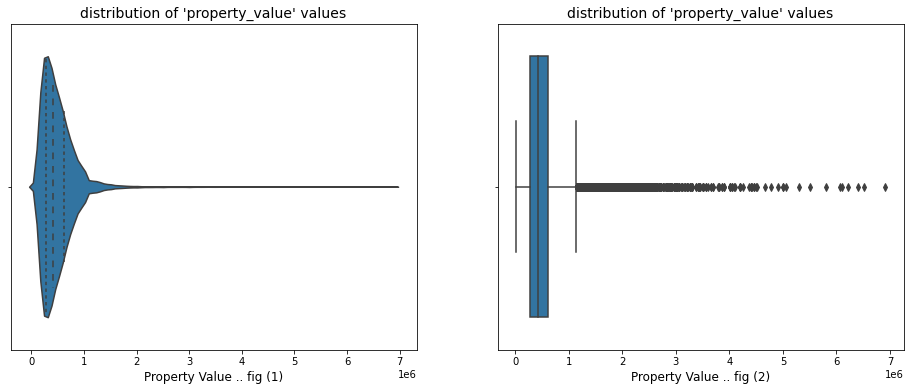

In [139]:
# property_value visualization :

plt.figure(figsize = [16,6]);

plt.subplot(1,2,1);
sb.violinplot(data = df, x = 'property_value', inner = 'quartile');
plt.xlabel("Property Value .. fig (1)", size = 12)
plt.title("distribution of 'property_value' values", size = 14);

plt.subplot(1,2,2);
sb.boxplot(data = df, x = 'property_value');
plt.title("distribution of 'property_value' values", size = 14);
plt.xlabel("Property Value .. fig (2)", size = 12);

In [140]:
# outliers :
IQR = df.property_value.quantile(0.75) - df.property_value.quantile(0.25)
upper_limit_value = IQR*1.5
upper_limit_value

525000.0

In [141]:
# number or records which thier property value is higher than upper_limit_value :
df[df['property_value'] > upper_limit_value].shape[0]

42362

In [142]:
# percentage of records which thier property value is higher than upper_limit_value :
(df[df['property_value'] > upper_limit_value].shape[0] / df.shape[0])*100

35.723200431761455

* we can see that :
1. if we used IQR methode to detect the outliers we will get more than 35% of data records are outliers, this is a big percentage and if we gonna remove those outliers this will affect our analysis.
2. We will leave all values as it is.

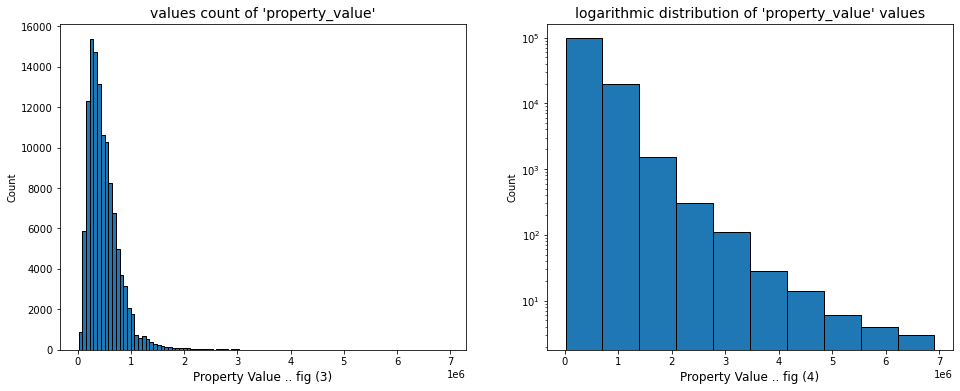

In [143]:
plt.figure(figsize = [16,6]);

plt.subplot(1,2,1);
bins = np.arange(df.property_value.min(), df.property_value.max() + 70000, 70000)
plt.hist(data = df,  x = 'property_value', edgecolor = 'black', bins = bins);
plt.xlabel("Property Value .. fig (3)", size = 12)
plt.ylabel("Count");
plt.title("values count of 'property_value'", size = 14);


plt.subplot(1,2,2);
plt.hist(data = df,  x = 'property_value', edgecolor = 'black');
plt.yscale("log")
plt.xlabel("Property Value .. fig (4)", size = 12)
plt.ylabel("Count");
plt.title("logarithmic distribution of 'property_value' values", size = 14);

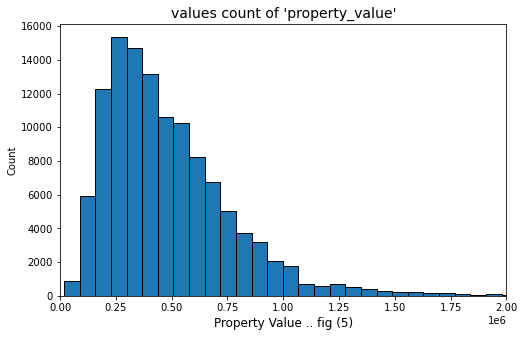

In [144]:
# limit fig (3) : 
plt.figure(figsize = [8,5]);
bins = np.arange(df.property_value.min(), df.property_value.max() + 70000, 70000)
plt.hist(data = df,  x = 'property_value', edgecolor = 'black', bins = bins);
plt.xlabel("Property Value .. fig (5)", size = 12)
plt.ylabel("Count");
plt.title("values count of 'property_value'", size = 14);
plt.xlim([0,2000000]);

##### from fig (5) we can see that :
* the property value distribution is right skewed.

##### also from fig (4)  we can see that :
* as property value increased, the number of properties of the same value decreased in logarithmic function !

In [145]:
df.head(3)

,credit_facility,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,business_or_commercial,loan_amount,term,neg_ammortization,interest_only,lump_sum_payment,property_value,occupancy_type,total_units,income,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,ltv,region,security_type,status,dtir1
0,1,Sex Not Available,0,type1,p1,l1,0,116500,360,0,0,0,118000.0,pr,1U,1740,EXP,758,CIB,25-34,1,98.7288,south,direct,1,45.0
2,1,Male,1,type1,p1,l1,0,406500,360,1,0,0,508000.0,pr,1U,9480,EXP,834,CIB,35-44,1,80.0197,south,direct,0,46.0
3,1,Male,0,type1,p4,l1,0,456500,360,0,0,0,658000.0,pr,1U,11880,EXP,587,CIB,45-54,0,69.3769,North,direct,0,42.0


In [146]:
# ممكن نرجع ل loan_amount 
# و نعمل جراف لوغارتم زى ما عملنا هنا و لو كده ممكن منمسحسش ال outliers

In [115]:
# credit_score :
df.credit_score.describe()

count    118584.000000
mean        699.607030
std         115.831369
min         500.000000
25%         599.000000
50%         699.000000
75%         800.000000
max         900.000000
Name: credit_score, dtype: float64

In [119]:
# describtive statistics and visualisation plot of 'credit_score' column show that this feature will not have a strong effdect 
# on our prediction of status , we will remove this columns

In [142]:
# security_type feature have the same value for all records , we will remove it from our data :
df.security_type.unique()

array(['direct'], dtype=object)

In [143]:
df = df.drop(columns = ['security_type'])

## Machine Learnig part ( loan status prediction )

In [187]:
# now we will choose the columns that could effect on our prediction :
df = df.drop(columns = ['gender','construction_type','secured_by','credit_type','co-applicant_credit_type','security_type','occupancy_type'])

In [188]:
df.head()

,credit_facility,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,loan_amount,term,neg_ammortization,interest_only,lump_sum_payment,property_value,total_units,income,credit_score,age,submission_of_application,ltv,status,dtir1
0,1,0,type1,p1,l1,0,0,116500,360,0,0,0,118000.0,1U,1740,758,25-34,1,98.7288,1,45.0
2,1,1,type1,p1,l1,0,0,406500,360,1,0,0,508000.0,1U,9480,834,35-44,1,80.0197,0,46.0
3,1,0,type1,p4,l1,0,0,456500,360,0,0,0,658000.0,1U,11880,587,45-54,0,69.3769,0,42.0
4,1,1,type1,p1,l1,0,0,696500,360,0,0,0,758000.0,1U,10440,602,25-34,0,91.8865,0,39.0
5,1,1,type1,p1,l1,0,0,706500,360,0,0,0,1008000.0,1U,10080,864,35-44,0,70.0893,0,40.0


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120526 entries, 0 to 148669
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   credit_facility            120526 non-null  int64  
 1   approv_in_adv              120526 non-null  int64  
 2   loan_type                  120526 non-null  object 
 3   loan_purpose               120526 non-null  object 
 4   credit_worthiness          120526 non-null  object 
 5   open_credit                120526 non-null  int64  
 6   business_or_commercial     120526 non-null  int64  
 7   loan_amount                120526 non-null  int64  
 8   term                       120526 non-null  object 
 9   neg_ammortization          120526 non-null  int64  
 10  interest_only              120526 non-null  int64  
 11  lump_sum_payment           120526 non-null  int64  
 12  property_value             120526 non-null  float64
 13  total_units                12

In [190]:
# we have to change the type of ( term ,income and ltv ) columns ---- from object to float :
df['term'] = df['term'].astype(np.float16)
df['income'] = df['income'].astype(np.float16)
df['ltv'] = df['ltv'].astype(np.float16)

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120526 entries, 0 to 148669
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   credit_facility            120526 non-null  int64  
 1   approv_in_adv              120526 non-null  int64  
 2   loan_type                  120526 non-null  object 
 3   loan_purpose               120526 non-null  object 
 4   credit_worthiness          120526 non-null  object 
 5   open_credit                120526 non-null  int64  
 6   business_or_commercial     120526 non-null  int64  
 7   loan_amount                120526 non-null  int64  
 8   term                       120526 non-null  float16
 9   neg_ammortization          120526 non-null  int64  
 10  interest_only              120526 non-null  int64  
 11  lump_sum_payment           120526 non-null  int64  
 12  property_value             120526 non-null  float64
 13  total_units                12

In [192]:
df.total_units.value_counts()

1U    118730
2U      1207
3U       318
4U       271
Name: total_units, dtype: int64

In [100]:
df = pd.get_dummies(data = df, columns = ['loan_type','loan_purpose','credit_worthiness','occupancy_type','total_units','age'])

In [101]:
df.head()

,credit_facility,approv_in_adv,open_credit,business_or_commercial,loan_amount,term,neg_ammortization,interest_only,lump_sum_payment,property_value,income,credit_score,submission_of_application,ltv,status,dtir1,loan_type_type1,loan_type_type2,loan_type_type3,loan_purpose_p1,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,credit_worthiness_l1,credit_worthiness_l2,occupancy_type_ir,occupancy_type_pr,occupancy_type_sr,total_units_1U,total_units_2U,total_units_3U,total_units_4U,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
0,1,0,0,0,116500,360,0,0,0,118000.0,1740,758,1,98.7288,1,45.0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
2,1,1,0,0,406500,360,1,0,0,508000.0,9480,834,1,80.0197,0,46.0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,456500,360,0,0,0,658000.0,11880,587,0,69.3769,0,42.0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
4,1,1,0,0,696500,360,0,0,0,758000.0,10440,602,0,91.8865,0,39.0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,0,706500,360,0,0,0,1008000.0,10080,864,0,70.0893,0,40.0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0


In [102]:
df.shape

(120526, 39)

In [103]:
# import our sklearn libraries which we will use during analysis:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [107]:
x = df.drop('status', axis = 'columns')
y = df['status']

In [109]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.33 )

In [114]:
model = AdaBoostClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print ("accuracy score for",model,'model =',accuracy_score(y_test, y_pred))
print("f1_score for",model,'model =',f1_score(y_test, y_pred))

accuracy score for AdaBoostClassifier() model = 0.8551063508824861
f1_score for AdaBoostClassifier() model = 0.3406932845212218
